# Example-based evaluations

This notebook computes the ensemble mean and histograms of 99-th probabilities for 1 January 2021 as an evaluation example. 

In [1]:
# general tools
import os
import sys
import time
import h5py
from glob import glob

import numpy as np
from datetime import datetime, timedelta

In [2]:
# graph tools
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.colors as mcolors
import matplotlib.patches as patches
from matplotlib.collections import PatchCollection

from matplotlib import ticker
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/')
sys.path.insert(0, '/glade/u/home/ksha/GAN_proj/libs/')

from namelist import *
import data_utils as du
import graph_utils as gu
import verif_utils as vu

In [5]:
with h5py.File(save_dir+'CCPA_domain.hdf', 'r') as h5io:
    lon_CCPA = h5io['lon_CCPA'][...]
    lat_CCPA = h5io['lat_CCPA'][...]
    land_mask_CCPA = h5io['land_mask_CCPA'][...]
land_mask_CCPA = land_mask_CCPA == 1.0
ocean_mask_CCPA = land_mask_CCPA == 0.0

In [6]:
LEADs = np.arange(6, 144+6, 6)

In [7]:
with h5py.File(camp_dir+'CCPA/CCPA_lead_y2021.hdf', 'r') as h5io:
    CCPA_true = h5io['CCPA_lead'][...]

with h5py.File(camp_dir+'CCPA/CCPA_lead_y2020.hdf', 'r') as h5io:
    CCPA_true_2020 = h5io['CCPA_lead'][...]

In [8]:
q_bins = np.array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
                   0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
                   0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
                   0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
                   0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
                   0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
                   0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
                   0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
                   0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 
                   0.99, 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997, 0.998, 0.999, 1.0])

with h5py.File(camp_dir+'CCPA/CCPA_CDFs_lead_2002_2019.hdf', 'r') as h5io:
    CCPA_CDFs = h5io['CCPA_CDFs_lead'][...]

In [9]:
vmin = 0
vmax = 20
cmap_pct, A = gu.precip_cmap()

In [10]:
# N_days = 365
# N_scripts = 11
# day_gaps = int(N_days/N_scripts)
# day_inds = np.arange(0, N_days, day_gaps)
# day_inds[-1] = 365
# cmap_pct, A = gu.precip_cmap()

# ilead_ = 0
# y_true = CCPA_true[:, ilead_, ...]
# q_ = CCPA_CDFs[99, ilead_, ...]
# q_[q_<1e-1] = np.nan
# y_true_99 = CCPA_true[:, ilead_, ...]>q_

# N_counts = np.sum(y_true_99, axis=(1, 2))

## Validation time 1 January 2021 / init time December 2020

In [11]:
idays = [0, 1, 2, 3, 4]
ileads = [20, 16, 12, 8, 4]

/glade/derecho/scratch/ksha/tmp/ipykernel_2662/3320217692.py:14: RuntimeWarning: Mean of empty slice
  GEFS_mean = np.nanmean(GEFS_RAW, axis=0)
/glade/derecho/scratch/ksha/tmp/ipykernel_2662/3320217692.py:24: RuntimeWarning: Mean of empty slice
  LDM_mean = np.nanmean(LDM, axis=0)
/glade/derecho/scratch/ksha/tmp/ipykernel_2662/3320217692.py:33: RuntimeWarning: Mean of empty slice
  AnEn_mean = np.nanmean(AnEn, axis=0)


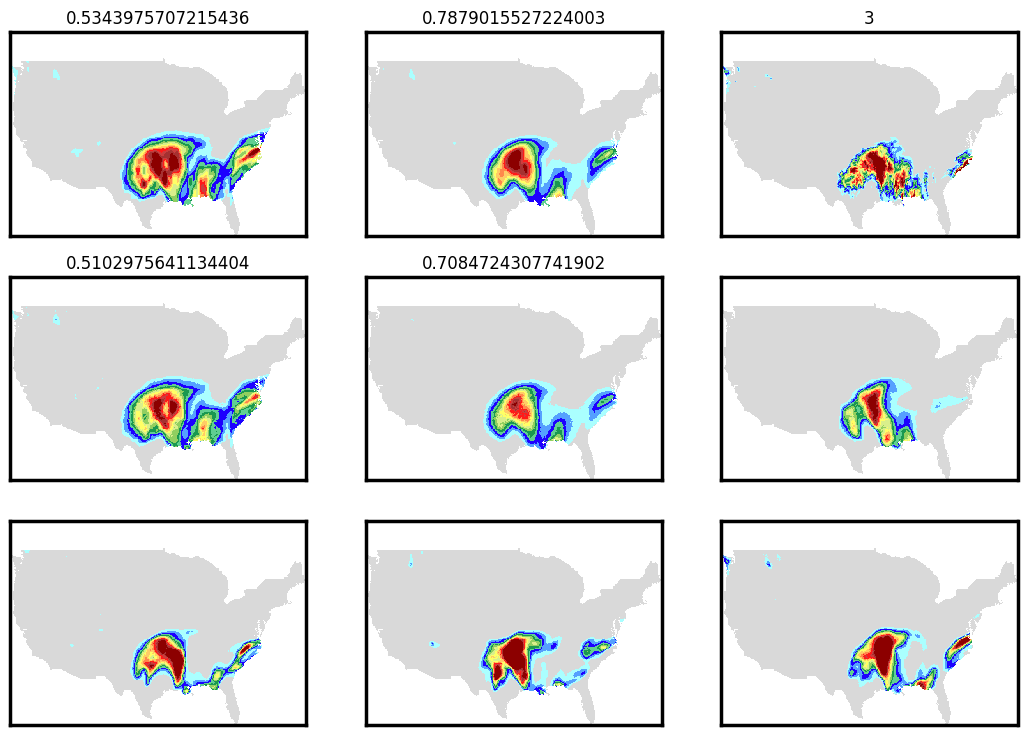

In [35]:
# for i in range(5):
i = 3
iday = idays[i]
ilead = ileads[i]

CCPA_pick = CCPA_true_2020[361+iday, ilead, ...]
CCPA_pick[ocean_mask_CCPA] = np.nan

# A GEFS raw 
with h5py.File(camp_dir+'GFS/GEFS_OPT_MEMBERS_2020_DEC.hdf', 'r') as h5io:
    GEFS_RAW = h5io['apcp'][361+iday, ilead, ...]
GEFS_RAW[:, ocean_mask_CCPA] = np.nan
# GEFS raw spread
GEFS_mean = np.nanmean(GEFS_RAW, axis=0)
GEFS_spread = np.nanstd(GEFS_RAW, axis=0)

# LDM members
filename = result_dir+'LDM_FULL_GEFS_2020_STEP100_EN062_20240427_ATT0.hdf'
with h5py.File(filename, 'r') as h5io:
    LDM = h5io['LDM_FULL'][iday, ilead, ...]
LDM[LDM < 0.1] = 0
LDM[:, ocean_mask_CCPA] = np.nan
# LDM spread
LDM_mean = np.nanmean(LDM, axis=0)
LDM_spread = np.nanstd(LDM, axis=0)


filename = camp_dir+'AnEn_baseline/AnEn_ECC_2020_lead{:02d}_.hdf'.format(LEADs[ilead])
with h5py.File(filename, 'r') as h5io:
    AnEn = h5io['AnEn'][1+iday, ...]
    
AnEn[:, ocean_mask_CCPA] = np.nan
AnEn_mean = np.nanmean(AnEn, axis=0)
AnEn_spread = np.nanstd(AnEn, axis=0)

# ================================================================================ #
# 99-th probs

q_ = CCPA_CDFs[99, ilead, ...]
# q_[q_<1e-1] = np.nan

LDM_prob_99 = np.nanmean(LDM > q_[None, ...], axis=0)
AnEn_prob_99 = np.nanmean(AnEn > q_[None, ...], axis=0)
RAW_prob_99 = np.nanmean(GEFS_RAW > q_[None, ...], axis=0)
y_true_99 = CCPA_pick>q_

LDM_prob_99[ocean_mask_CCPA] = np.nan
RAW_prob_99[ocean_mask_CCPA] = np.nan
AnEn_prob_99[ocean_mask_CCPA] = np.nan

# ================================================================================ #
# Try in a figure
fig = plt.figure(figsize=(13, 9)) #, dpi=dpi_
gs = gridspec.GridSpec(3, 3, height_ratios=[1, 1, 1], width_ratios=[1, 1, 1])
AX = []
for i in range(3):
    for j in range(3):
        AX.append(plt.subplot(gs[i, j]))
        
for i, ax in enumerate(AX):
    ax = gu.ax_decorate_box(ax)

AX[0].pcolormesh(lon_CCPA, lat_CCPA, GEFS_spread, vmin=vmin, vmax=10, cmap=cmap_pct)
AX[1].pcolormesh(lon_CCPA, lat_CCPA, GEFS_mean, vmin=vmin, vmax=vmax, cmap=cmap_pct)
AX[2].pcolormesh(lon_CCPA, lat_CCPA, CCPA_pick, vmin=vmin, vmax=vmax, cmap=cmap_pct)
AX[3].pcolormesh(lon_CCPA, lat_CCPA, LDM_spread, vmin=vmin, vmax=10, cmap=cmap_pct)
AX[4].pcolormesh(lon_CCPA, lat_CCPA, LDM_mean, vmin=vmin, vmax=vmax, cmap=cmap_pct)

count = 0
for n in [5, 6, 7, 8]:
    AX[n].pcolormesh(lon_CCPA, lat_CCPA, LDM[count, ...], vmin=vmin, vmax=vmax, cmap=cmap_pct)
    count += 1

mae_RAW = np.nanmean(np.abs(GEFS_mean - CCPA_pick))
CRPS_RAW, _, _ = vu.CRPS_2d(CCPA_pick[None, ...], GEFS_RAW[None, ...], land_mask_CCPA)
crps_RAW = np.nanmean(CRPS_RAW)

mae_LDM = np.nanmean(np.abs(LDM_mean - CCPA_pick))
CRPS_LDM, _, _ = vu.CRPS_2d(CCPA_pick[None, ...], LDM[None, ...], land_mask_CCPA)
crps_LDM = np.nanmean(CRPS_LDM)

AX[2].set_title(iday)

AX[0].set_title(crps_RAW)
AX[1].set_title(mae_RAW)

AX[3].set_title(crps_LDM)
AX[4].set_title(mae_LDM)

dict_save = {}
dict_save['GEFS_mean'] = GEFS_mean
dict_save['GEFS_RAW'] = GEFS_RAW
dict_save['GEFS_RAW_p99'] = RAW_prob_99

dict_save['LDM_mean'] = LDM_mean
dict_save['LDM'] = LDM
dict_save['LDM_p99'] = LDM_prob_99

dict_save['AnEn_mean'] = AnEn_mean
dict_save['AnEn'] = AnEn
dict_save['AnEn_p99'] = AnEn_prob_99

dict_save['CCPA'] = CCPA_pick
dict_save['CCPA_p99'] = y_true_99

np.save(result_dir+'example_20210101_f48_re.npy', dict_save)

# fig.savefig(fig_dir+'fig_example_iday{}.png'.format(iday), format='png')